In [276]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [277]:
df=pd.read_csv("brain_stroke_cleaned.csv")
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [278]:
df["gender"].value_counts()
# This command will show the count of each unique value in the "gender" 
# column of the DataFrame.This helps you understand the distribution
# of genders in your dataset 

gender
0    2907
1    2074
Name: count, dtype: int64

In [279]:
df["work_type"].value_counts()

work_type
1    2860
2     804
3     673
0     644
Name: count, dtype: int64

In [280]:
df["Residence_type"].value_counts()

Residence_type
1    2532
0    2449
Name: count, dtype: int64

In [281]:
df["smoking_status"].value_counts()

smoking_status
2    1838
0    1500
1     867
3     776
Name: count, dtype: int64

In [282]:
df.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.416382,43.419859,0.096165,0.055210,0.658502,1.302349,0.508332,105.943562,28.498173,1.379442,0.049789
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.860170,0.499981,45.075373,6.790464,1.072180,0.217531
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,1.000000,0.000000,77.230000,23.700000,0.000000,0.000000
50%,0.000000,45.000000,0.000000,0.000000,1.000000,1.000000,1.000000,91.850000,28.100000,2.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,2.000000,1.000000,113.860000,32.600000,2.000000,0.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,3.000000,1.000000,271.740000,48.900000,3.000000,1.000000


In [283]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int64  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int64  
 5   work_type          4981 non-null   int64  
 6   Residence_type     4981 non-null   int64  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int64  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 428.2 KB


In [284]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [285]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [286]:
df.duplicated().value_counts()

False    4981
Name: count, dtype: int64

gender


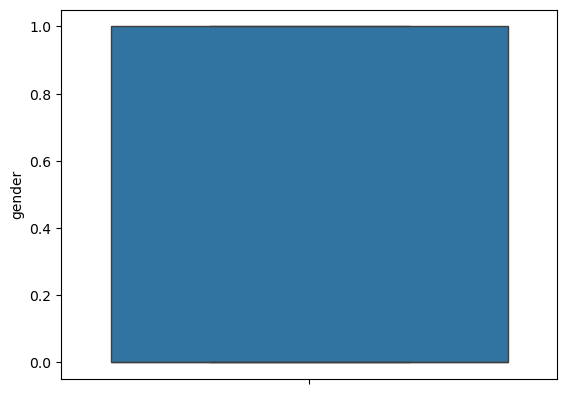

age


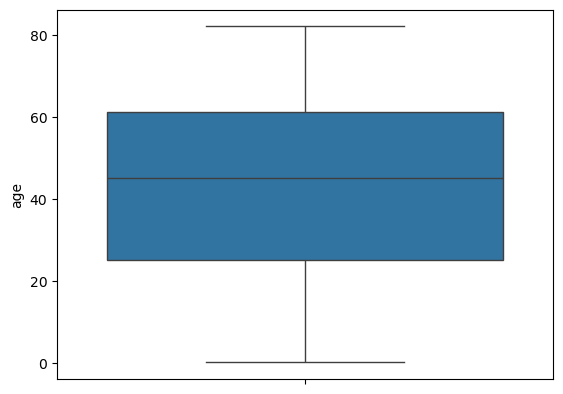

hypertension


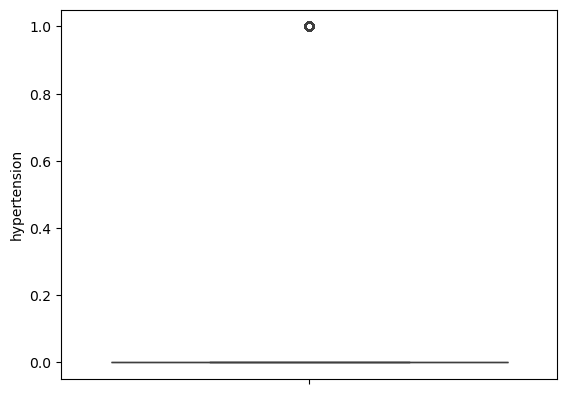

heart_disease


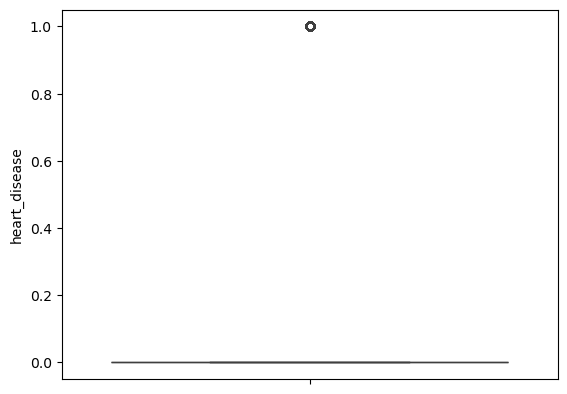

ever_married


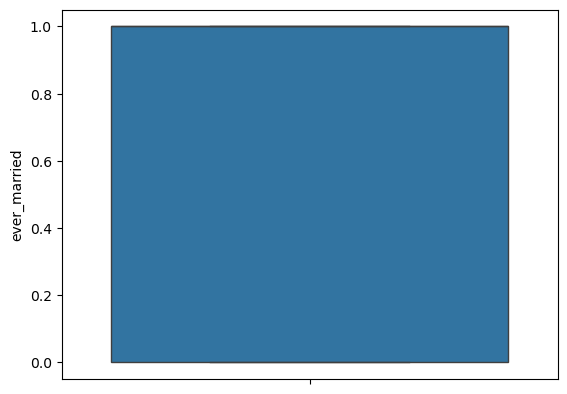

work_type


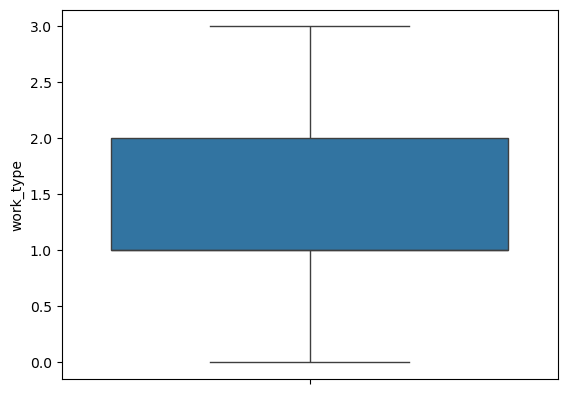

Residence_type


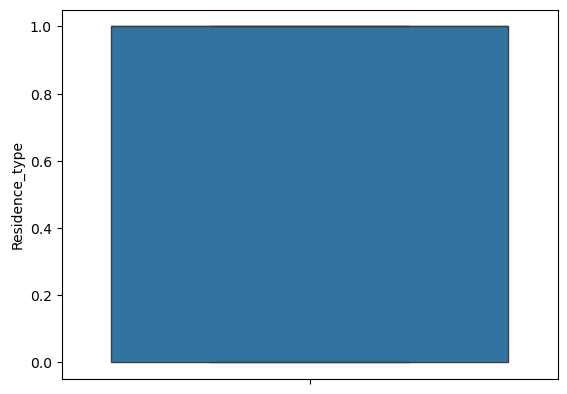

avg_glucose_level


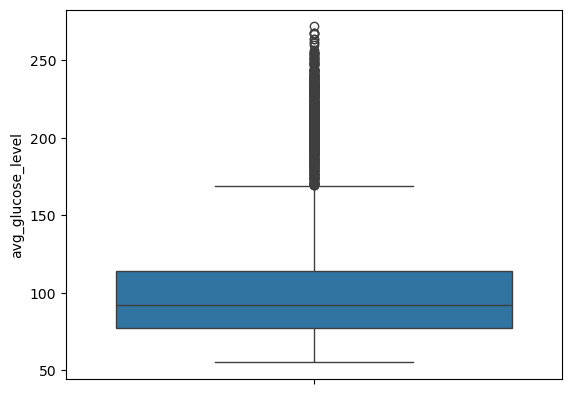

bmi


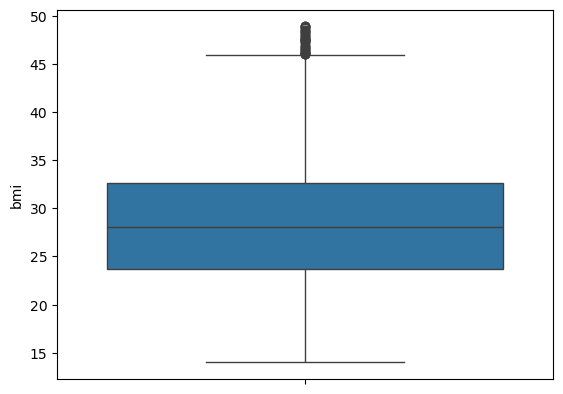

smoking_status


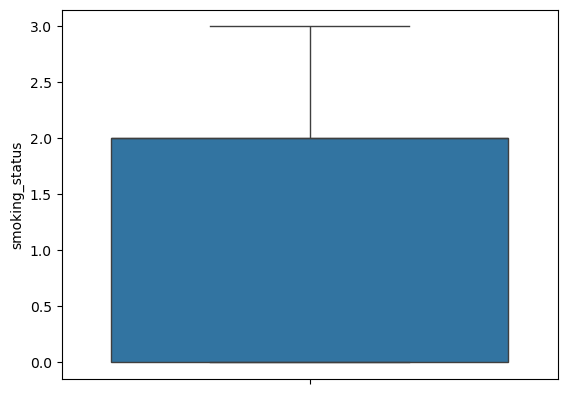

stroke


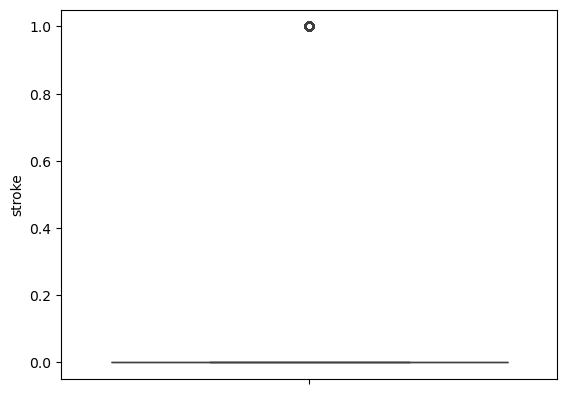

In [287]:
for col in df:
 print(col)
 sns.boxplot(df[col])
 plt.show()

In [288]:
def replace_outliers(df,column):
    q1 = df[column].quantile(0.25)  # 25th percentile
    q3 = df[column].quantile(0.75)  # 75th percentile
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    uw = q3 + 1.5 * iqr
    replace_median=df[column].median()
    outlier = (df[column]<lw) | (df[column]>uw)
    df.loc[outlier, column] = replace_median
    return df

In [289]:
df = replace_outliers(df,"avg_glucose_level")

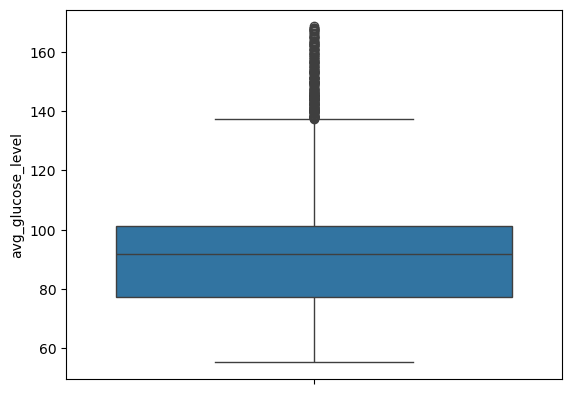

In [290]:
sns.boxplot(data=df,y="avg_glucose_level")
plt.show()

In [291]:
from scipy.stats import skew

In [292]:
numerical_cols=df.select_dtypes(["int","float"]).columns
for c in numerical_cols:
    print(f"{c} : {skew(df[c])}")

gender : 0.3392486354577659
age : -0.14395782687169578
hypertension : 2.7395518880312983
heart_disease : 3.8950177550078386
ever_married : -0.6684871313710153
work_type : 0.6513384616024904
Residence_type : -0.03333126904227681
avg_glucose_level : 0.9061160371617706
bmi : 0.37144101480702485
smoking_status : -0.03957077923680953
stroke : 4.139695094515532


In [351]:

df["hypertension"] =np.log1p(df["hypertension"])
df["heart_diseas"] =np.log1p(df["heart_disease"])
df["avg_glucose_level"] =np.log1p(df["avg_glucose_level"])


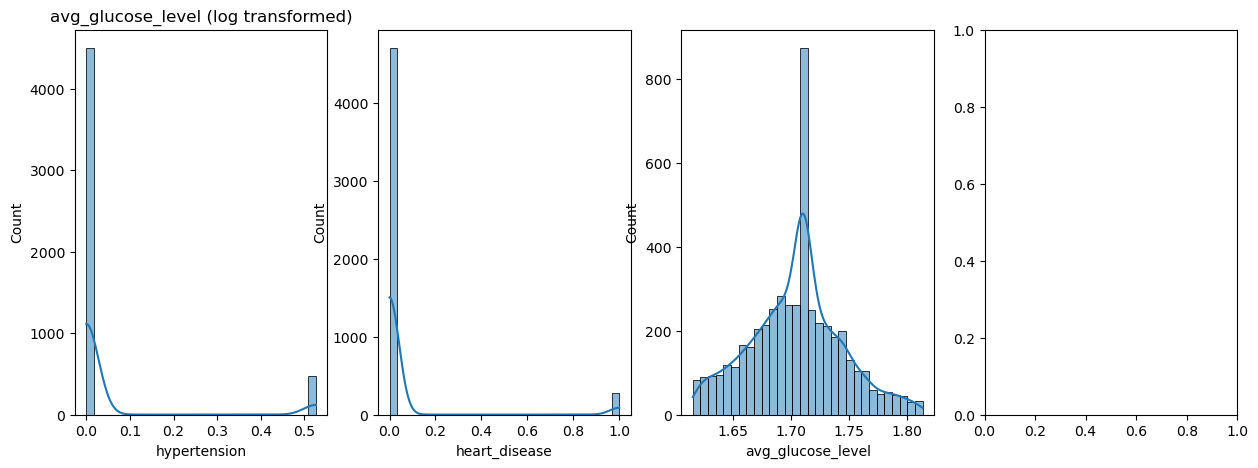

In [353]:
fig, axes = plt.subplots(1,4, figsize = (15, 5))

sns.histplot(df["hypertension"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("hypertension (log transformed)")

sns.histplot(df["heart_disease"], bins=30, kde=True, ax=axes[1])
axes[0].set_title("heart_disease_log (log transformed)")

sns.histplot(df["avg_glucose_level"], bins=30, kde=True, ax=axes[2])
axes[0].set_title("avg_glucose_level (log transformed)")

plt.show()

In [295]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'heart_diseas'],
      dtype='object')

In [296]:
features=df.drop("stroke",axis=1)
target=df["stroke"]

In [297]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
heart_diseas         0
dtype: int64

In [298]:
from  sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(features,target,
                                             test_size=0.25, random_state=42)
print("Training Data Shape" , xtrain.shape,ytrain.shape)
print("Testing Data Shape " , xtest.shape,ytest.shape)

Training Data Shape (3735, 11) (3735,)
Testing Data Shape  (1246, 11) (1246,)


In [299]:
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [300]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    train_score=model.score(xtrain,ytrain)
    test_score=model.score(xtest,ytest)
    print(f"T raining Score : {train_score}")
    print(f"Testing Score : { test_score}")
    print(f"Confusion Matrix : \n{confusion_matrix(ytest,ypred)}")
    print(f"Classification Report : \n{classification_report(ytest,ypred)}")
    return model

In [301]:
mymodel(LogisticRegression())

T raining Score : 0.9520749665327979
Testing Score : 0.9446227929373997
Confusion Matrix : 
[[1177    0]
 [  69    0]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1177
           1       0.00      0.00      0.00        69

    accuracy                           0.94      1246
   macro avg       0.47      0.50      0.49      1246
weighted avg       0.89      0.94      0.92      1246



LogisticRegression()

In [302]:
dt=mymodel(DecisionTreeClassifier())
dt

T raining Score : 1.0
Testing Score : 0.9125200642054575
Confusion Matrix : 
[[1125   52]
 [  57   12]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1177
           1       0.19      0.17      0.18        69

    accuracy                           0.91      1246
   macro avg       0.57      0.56      0.57      1246
weighted avg       0.91      0.91      0.91      1246



DecisionTreeClassifier()

In [303]:
from sklearn.naive_bayes import GaussianNB

In [304]:
mymodel(GaussianNB())

T raining Score : 0.8722891566265061
Testing Score : 0.8764044943820225
Confusion Matrix : 
[[1060  117]
 [  37   32]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1177
           1       0.21      0.46      0.29        69

    accuracy                           0.88      1246
   macro avg       0.59      0.68      0.61      1246
weighted avg       0.92      0.88      0.90      1246



GaussianNB()

In [305]:
pip install imbalanced.learn

Note: you may need to restart the kernel to use updated packages.


In [306]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
xsample,ysample = ros.fit_resample(xtrain,ytrain)
ysample.value_counts()

stroke
0    3556
1    3556
Name: count, dtype: int64

In [307]:
model = (DecisionTreeClassifier(max_depth=15,min_samples_split=12))
model.fit(xsample,ysample)
ypred=model.predict(xtest)
train_score=model.score(xsample,ysample)
test_score=model.score(xtest,ytest)
print(f"Training Score : {train_score}")
print(f"Testing Score : { test_score}")
print(f"Confusion Matrix : \n{confusion_matrix(ytest,ypred)}")
print(f"Classification Report : {classification_report(ytest,ypred)}")

Training Score : 0.9770809898762655
Testing Score : 0.8796147672552167
Confusion Matrix : 
[[1080   97]
 [  53   16]]
Classification Report :               precision    recall  f1-score   support

           0       0.95      0.92      0.94      1177
           1       0.14      0.23      0.18        69

    accuracy                           0.88      1246
   macro avg       0.55      0.57      0.56      1246
weighted avg       0.91      0.88      0.89      1246



In [308]:
# To deal with overfitting apply Pruning techniques
parameters={
    "criterion":["gini","entropy"],
"max_depth":list(range(1,4)),
    "min_samples_split":list(range(1,4))
}

In [309]:
from sklearn.model_selection import GridSearchCV
clf= GridSearchCV(DecisionTreeClassifier(), parameters, verbose=2)
clf.fit(xtrain,ytrain)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ...criterion=gini, max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=1; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=2; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_samples_split=3; total time=   0.0s
[CV] END ...criterion=gini, max_depth=1, min_sam

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3],
                         'min_samples_split': [1, 2, 3]},
             verbose=2)

In [310]:
clf.best_score_

0.9520749665327978

In [311]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=1)

In [312]:
dt=mymodel(clf.best_estimator_)
dt

T raining Score : 0.9520749665327979
Testing Score : 0.9446227929373997
Confusion Matrix : 
[[1177    0]
 [  69    0]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      1177
           1       0.00      0.00      0.00        69

    accuracy                           0.94      1246
   macro avg       0.47      0.50      0.49      1246
weighted avg       0.89      0.94      0.92      1246



DecisionTreeClassifier(max_depth=1)